In [1]:
import itertools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
np.random.seed(2)

samples = 100
mu = [(7,5),(8,2),(1,10)]

cov =[
    [[0.5,0],[0,1.0]],
    [[2.0,0],[0,3.5]],
    [[3,0],[0,5]],
]

norm_dists = [
    np.random.multivariate_normal(m,c,samples) 
    for m,c in zip(mu,cov)
]

X = np.array(list(itertools.chain(*norm_dists)))

km2 = KMeans(n_clusters=2)
km2.fit(X)
km2_labels = km2.labels_

km3 = KMeans(n_clusters=3)
km3.fit(X)
km3_labels = km3.labels_

km4 = KMeans(n_clusters=4)
km4.fit(X)
km4_labels = km4.labels_

km5 = KMeans(n_clusters=5)
km5.fit(X)
km5_labels = km5.labels_

km6 = KMeans(n_clusters=6)
km6.fit(X)
km6_labels = km6.labels_

Text(0.5, 1.0, 'K-Means with $k=4$')

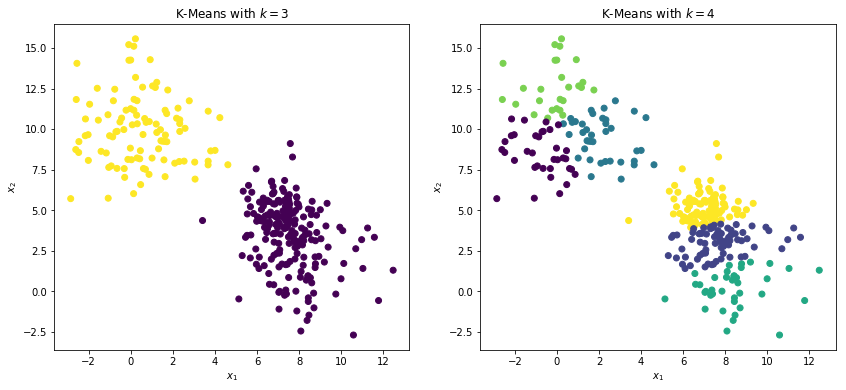

In [4]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (14,6))
ax1.scatter(X[:,0],X[:,1],c = km2_labels.astype(np.float))
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title('K-Means with $k=3$')

ax2.scatter(X[:,0],X[:,1],c = km6_labels.astype(np.float))
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('K-Means with $k=4$')

# ax3.scatter(X[:,0],X[:,1],c = km5_labels.astype(np.float))
# ax3.set_xlabel('$x_1$')
# ax3.set_ylabel('$x_2$')
# ax3.set_title('K-Means with $k=5$')

# ax4.scatter(X[:,0],X[:,1],c = km6_labels.astype(np.float))
# ax4.set_xlabel('$x_1$')
# ax4.set_ylabel('$x_2$')
# ax4.set_title('K-Means with $k=6$')

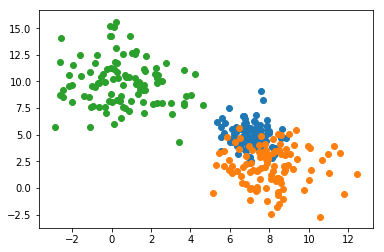

In [5]:
plt.scatter([norm_dists[0][i][0] for i in range(100)],[norm_dists[0][i][1] for i in range(100)])
plt.scatter([norm_dists[1][i][0] for i in range(100)],[norm_dists[1][i][1] for i in range(100)])
plt.scatter([norm_dists[2][i][0] for i in range(100)],[norm_dists[2][i][1] for i in range(100)])

In [6]:
import copy
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import (
DateFormatter,WeekdayLocator,DayLocator,MONDAY
)
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from sklearn.cluster import KMeans

In [7]:
def get_open_normalized_prices(df):
    df['H/O'] = df['High']/df['Open']
    df['L/O'] = df['Low']/df['Open']
    df['C/O'] = df['Last']/df['Open']
    df.drop(['Open','High','Low','Last','Change','Settle','Volume','PreviousDayOpenInterest'],axis = 1,inplace = True)
    return df

In [8]:
def plot_candlesticks(data,since):
    df = copy.deepcopy(data)
    df = df[df.index >= since]
    df.reset_index(inplace = True)
    df['date_fmt'] = df['Date'].apply(lambda date :mdates.date2num(date.to_pydatetime()))
    
    mondays = WeekdayLocator(MONDAY)
    alldays = DayLocator()
    weekFormatter = DateFormatter('%b %d')
    fig,ax = plt.subplots(figsize = (16,4))
    fig.subplots_adjust(bottom = 0.2)
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)
    
    csticks = candlestick_ohlc(ax,df[['date_fmt','Open','High','Low','Last']].values,width = 0.6,
                               colorup = '#000000',colordown = '#ff0000')
    ax.set_facecolor((1,1,0.9))
    #ax.xaxis.date()
    plt.setp(plt.gca().get_xticklabels(),
            rotation = 45,horizontalalignment = 'right')
    plt.show()

In [9]:
def plot_3d_normalized_candles(data):
    fig = plt.figure(figsize = (12,9))
    ax = Axes3D(fig,elev = 21,azim = -136)
    ax.scatter(
        data['H/O'],data['L/O'],data['C/O'],c = labels.astype(np.float))
    ax.set_xlabel('High/Open')
    ax.set_ylabel('Low/Open')
    ax.set_zlabel('Close/Open')
    plt.show()

In [10]:
def plot_cluster_ordered_candles(data):
    mondays = WeekdayLocator(MONDAY)
    alldays = DayLocator()
    weekFormatter = DateFormatter('')
    fig,ax = plt.subplots(figsize = (16,4))
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)
    
    df = copy.deepcopy(data)
    df.sort_values(by = 'Cluster',inplace = True)
    df.reset_index(inplace = True)
    df['clust_index'] = df.index
    df['clust_change'] = df['Cluster'].diff()
    change_indices = df[df['clust_change'] != 0]
    
    csticks = candlestick_ohlc(ax,df[['clust_index','Open','High','Low','Last']].values,width = 0.6,
                              colorup = '#000000',colordown = '#ff0000')
    ax.set_facecolor((1,1,0.9))
    
    for row in change_indices.iterrows():
        plt.axvline(row[1]['clust_index'],linestyle = 'dashed',c = 'blue')
        
    plt.xlim(0,len(df))
    plt.setp(plt.gca().get_xticklabels(),rotation = 45,horizontalalignment = 'right')
    plt.show()

In [11]:
def create_follow_cluster_matrix(data):
    data['ClusterTomorrow'] = data['Cluster'].shift(-1)
    data.dropna(inplace = True)
    data['ClusterTomorrow'] = data['ClusterTomorrow'].apply(int)
    sp500['ClusterMatrix'] = list(zip(data['Cluster'],data['ClusterTomorrow']))
    cmvc = data['ClusterMatrix'].value_counts()
    clust_mat = np.zeros((k,k))
    
    for row in cmvc.iteritems():
        clust_mat[row[0]] = row[1] *100/len(data)
    print('Cluster Follow-on Matrix:')
    print(clust_mat)

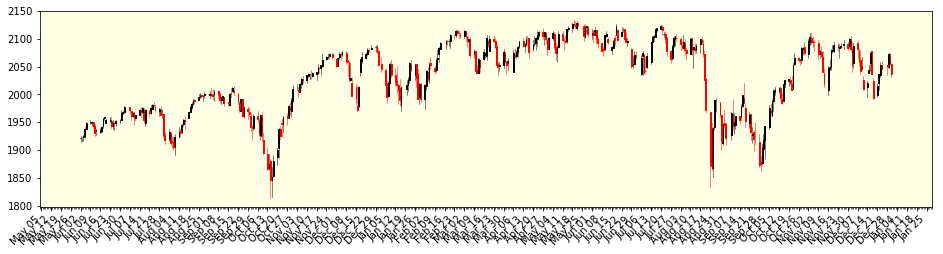

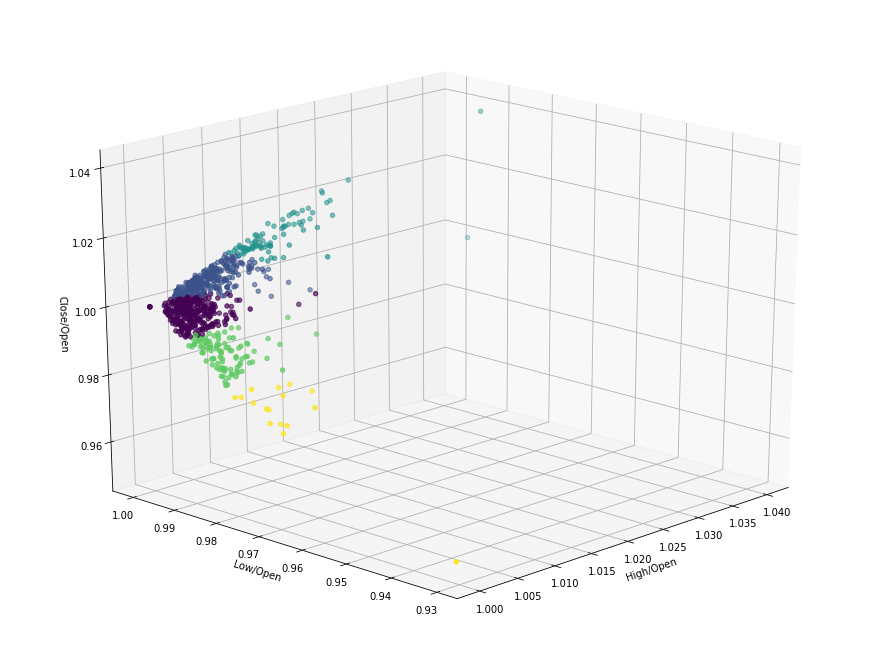

In [12]:
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2015,12,31)
sp500 = web.DataReader('CHRIS/CME_SP1','quandl',start,end,access_key = 'RGqizhsWNp9P1gM7wx5u')
plot_candlesticks(sp500,datetime.datetime(2014,6,1))
sp500_norm = get_open_normalized_prices(sp500)
k = 5
km = KMeans(n_clusters = k,random_state = 42)
km.fit(sp500_norm)
labels = km.labels_
sp500['Cluster'] = labels
plot_3d_normalized_candles(sp500_norm)

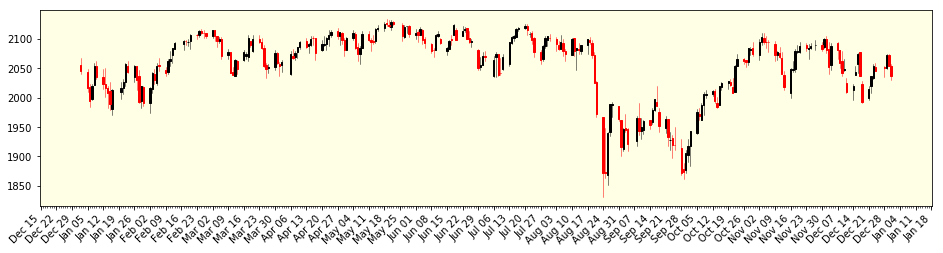

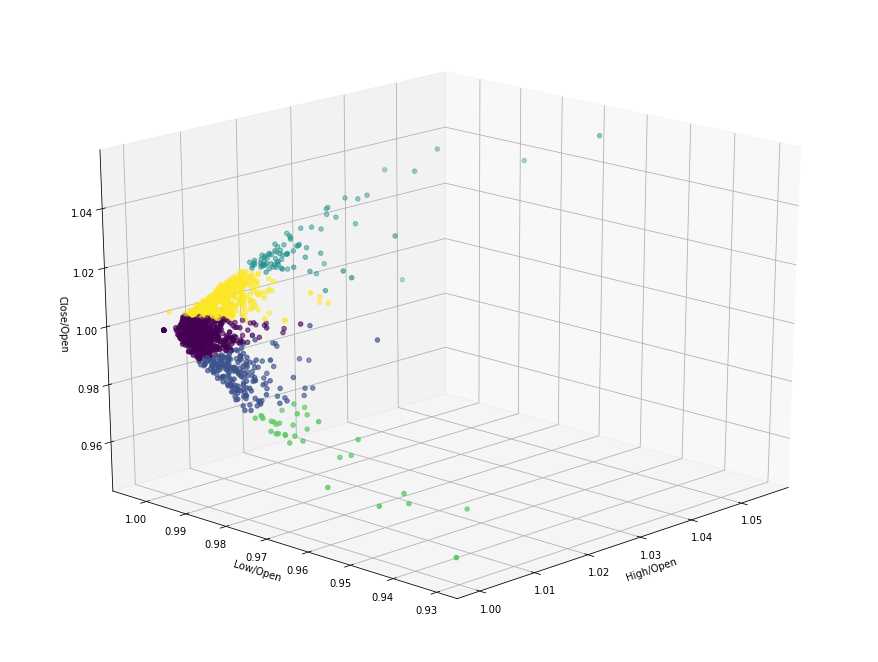

In [13]:
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2015,12,31)
sp500 = web.DataReader('CHRIS/CME_SP1','quandl',start,end,access_key = 'RGqizhsWNp9P1gM7wx5u')
plot_candlesticks(sp500,datetime.datetime(2015,1,1))
sp500_norm = get_open_normalized_prices(sp500)
k = 5
km = KMeans(n_clusters = k,random_state = 42)
km.fit(sp500_norm)
labels = km.labels_
sp500['Cluster'] = labels
plot_3d_normalized_candles(sp500_norm)

In [14]:
sp500.head()

,H/O,L/O,C/O,Cluster
Date,,,,
2015-12-31,1.001266,0.988318,0.991239,1
2015-12-30,1.000917,0.991169,0.991411,1
2015-12-29,1.011855,0.999171,1.010880,4
2015-12-28,1.000487,0.991766,0.999074,0
2015-12-24,1.003118,0.996152,0.996152,0


In [15]:
sp500_new = web.DataReader('CHRIS/CME_SP1','quandl',start,end,access_key = 'RGqizhsWNp9P1gM7wx5u')

In [16]:
sp500['Open'] = sp500_new['Open']
sp500['High'] = sp500_new['High']
sp500['Low'] = sp500_new['Low']
sp500['Last'] = sp500_new['Last']

In [17]:
create_follow_cluster_matrix(sp500)

Cluster Follow-on Matrix:
[[19.6656051   4.93630573  2.5477707   0.39808917 16.00318471]
 [ 6.36942675  2.86624204  1.59235669  0.55732484  3.98089172]
 [ 1.67197452  1.43312102  0.79617834  0.63694268  2.07006369]
 [ 0.55732484  0.55732484  0.07961783  0.47770701  0.95541401]
 [15.2866242   5.49363057  1.59235669  0.55732484  8.91719745]]


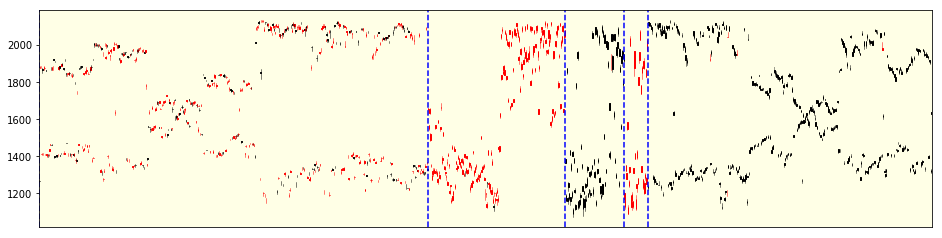

In [18]:
plot_cluster_ordered_candles(sp500)

In [19]:
sp500

,H/O,L/O,C/O,Cluster,Open,High,Low,Last,ClusterTomorrow,ClusterMatrix
Date,,,,,,,,,,
2015-12-31,1.001266,0.988318,0.991239,1,2054.5,2057.1,2030.5,2036.5,1,"(1, 1)"
2015-12-30,1.000917,0.991169,0.991411,1,2072.3,2074.2,2054.0,2054.5,4,"(1, 4)"
2015-12-29,1.011855,0.999171,1.010880,4,2049.7,2074.0,2048.0,2072.0,0,"(4, 0)"
2015-12-28,1.000487,0.991766,0.999074,0,2052.4,2053.4,2035.5,2050.5,0,"(0, 0)"
2015-12-24,1.003118,0.996152,0.996152,0,2052.9,2059.3,2045.0,2045.0,4,"(0, 4)"
2015-12-23,1.011602,0.998673,1.009242,4,2034.2,2057.8,2031.5,2053.0,4,"(4, 4)"
2015-12-22,1.007770,0.993665,1.007671,4,2020.6,2036.3,2007.8,2036.1,4,"(4, 4)"
2015-12-21,1.010005,0.998449,1.008004,4,1999.0,2019.0,1995.9,2015.0,1,"(4, 1)"
2015-12-18,1.002421,0.983943,0.984684,1,2024.0,2028.9,1991.5,1993.0,1,"(1, 1)"


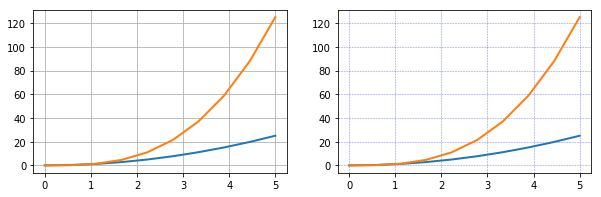

In [20]:
x = np.linspace(0, 5, 10)
y = x ** 2

fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

In [21]:
sp500_norm

,H/O,L/O,C/O,Cluster,Open,High,Low,Last,ClusterTomorrow,ClusterMatrix
Date,,,,,,,,,,
2015-12-31,1.001266,0.988318,0.991239,1,2054.5,2057.1,2030.5,2036.5,1,"(1, 1)"
2015-12-30,1.000917,0.991169,0.991411,1,2072.3,2074.2,2054.0,2054.5,4,"(1, 4)"
2015-12-29,1.011855,0.999171,1.010880,4,2049.7,2074.0,2048.0,2072.0,0,"(4, 0)"
2015-12-28,1.000487,0.991766,0.999074,0,2052.4,2053.4,2035.5,2050.5,0,"(0, 0)"
2015-12-24,1.003118,0.996152,0.996152,0,2052.9,2059.3,2045.0,2045.0,4,"(0, 4)"
2015-12-23,1.011602,0.998673,1.009242,4,2034.2,2057.8,2031.5,2053.0,4,"(4, 4)"
2015-12-22,1.007770,0.993665,1.007671,4,2020.6,2036.3,2007.8,2036.1,4,"(4, 4)"
2015-12-21,1.010005,0.998449,1.008004,4,1999.0,2019.0,1995.9,2015.0,1,"(4, 1)"
2015-12-18,1.002421,0.983943,0.984684,1,2024.0,2028.9,1991.5,1993.0,1,"(1, 1)"


AttributeError: 'list' object has no attribute 'scatter'

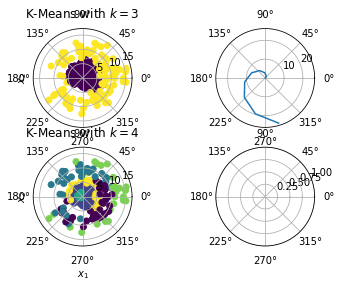

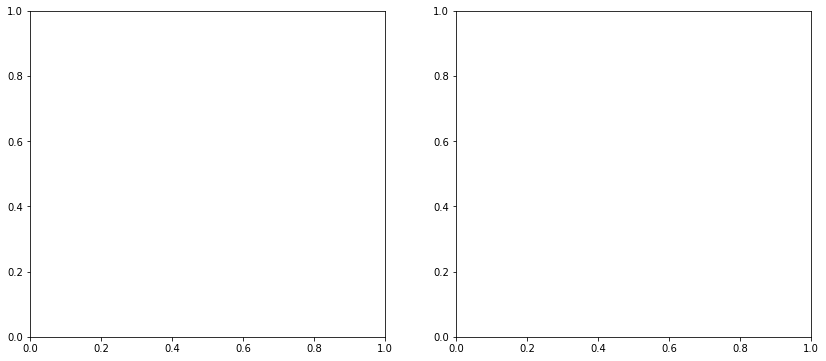

In [22]:
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True))


fig,(ax1,ax2) = plt.subplots(1,2,figsize = (14,6))
axs[0, 0].scatter(X[:,0],X[:,1],c = km2_labels.astype(np.float))
axs[0, 0].set_xlabel('$x_1$')
axs[0, 0].set_ylabel('$x_2$')
axs[0, 0].set_title('K-Means with $k=3$')

axs[1, 0].scatter(X[:,0],X[:,1],c = km6_labels.astype(np.float))
axs[1, 0].set_xlabel('$x_1$')
axs[1, 0].set_ylabel('$x_2$')
axs[1, 0].set_title('K-Means with $k=4$')

axs[0, 1].plot(x, y).scatter(X[:,0],X[:,1],c = km5_labels.astype(np.float))
axs[0, 1].plot(x, y).set_xlabel('$x_1$')
axs[0, 1].plot(x, y).set_ylabel('$x_2$')
axs[0, 1].plot(x, y).set_title('K-Means with $k=5$')

axs[1, 1].scatter(X[:,0],X[:,1],c = km6_labels.astype(np.float))
axs[1, 1].set_xlabel('$x_1$')
axs[1, 1].set_ylabel('$x_2$')
axs[1, 1].set_title('K-Means with $k=6$')

In [25]:
from math import * 

def bs_call(S,X,T,r,sigma):    
    d1 = (log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))    
    d2 = d1-sigma*sqrt(T)    
    return S*CND(d1)-X*exp(-r*T)*CND(d2)

def CND(X):
    (a1,a2,a3,a4 ,a5)=(0.31938153,-0.356563782,1.781477937,-1.821255978,1.330274429)  
    L = abs(X)  
    K=1.0/(1.0+0.2316419*L)  
    w=1.0-1.0/sqrt(2*pi)*exp(-L*L/2.)*(a1*K+a2*K*K+a3*pow(K,3)+a4*pow(K,4)+ a5*pow(K,5))  
    if X<0:       
        w = 1.0-w  
    return w 

In [26]:
bs_call(40,42,0.5,0.1,0.2) 

2.2777859030683096

In [27]:
from mpl_finance import quotes_historical_yahoo 
from pylab import * 
import numpy as np 
import pandas as pd 
from scipy.stats import norm 
n_shares=50                      # input 1 
confidence_level=0.99            # input 2 
n_days=10                        # input 3 
z=norm.ppf(confidence_level) 
ticker='WMT' 
begdate=(2012,1,1) 
enddate=(2012,12,31) 
x=quotes_historical_yahoo(ticker,begdate,enddate,asobject=True,adjusted=True) 
ret = (x.aclose[1:]-x.aclose[:-1])/x.aclose[:-1] 
position=n_shares*x.close[0] 
VaR=position*z*std(ret)*sqrt(n_days) 
print("Holding=",position, "VaR=", round(VaR,4), "in ", n_days, "Days") 
('Holding=', 2890.0, 'VaR=', 218.2253, 'in ', 10, 'Days') 

ImportError: cannot import name 'quotes_historical_yahoo' from 'mpl_finance' (G:\application\anaconda3\lib\site-packages\mpl_finance.py)

In [28]:
import tensorflow as tf

In [29]:
tf.logging.set_verbosity(tf.logging.ERROR)
fc = [tf.contrib.layers.real_valued_column('features')] 
model = tf.contrib.learn.DNNClassifier(hidden_units=5 * [250],n_classes=2,  feature_columns=fc)
def input_fn():
    fc = {'features': tf.constant(X)}
    la = tf.constant(y)
    return fc, la

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y) 

ValueError: Unknown label type: 'continuous'

In [31]:
labels

array([1, 1, 4, ..., 4, 0, 4])